## SARIMAX - Exercício

In [65]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima
from statsmodels.tools.eval_measures import mse,rmse                              

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

In [66]:
df = pd.read_csv('wind_data.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'D'
df = df.dropna()
df.head()

,WIND,RAIN,T.MAX,T.MIN,T.MIN.G
DATE,,,,,
1978-01-01,14.71,1.4,8.3,7.0,0.5
1978-01-02,17.08,6.6,9.1,1.9,-4.5
1978-01-03,21.96,11.3,5.7,3.1,-2.0
1978-01-04,8.38,1.9,8.9,2.6,-1.2
1978-01-05,13.88,0.0,9.4,4.6,2.1


O dataset wind_data contém dados sobre a velocidade do vento, juntamente dom outros dados meteorológicos - volume de chuva (RAIN), temperatura máxima (T.MAX), temperatura mínima (T.MIN e T.MIN.G). Obtenha um modelo de previsão usando SARIMA e calcule as métricas de erro MSE e RMSE. Em seguida, investigue se as colunas RAIN, T.MAX, T.MIN E T.MIN.G podem ser usadas como dados exógenos num modelo SARIMAX. Para tanto, teste cada uma das colunas como uma possível variável exógena, obtendo os valore de erro MSE e RMSE. Por fim, indique a melhor variável exógena (se houver), com base na comparação das métricas MSE e RMSE.

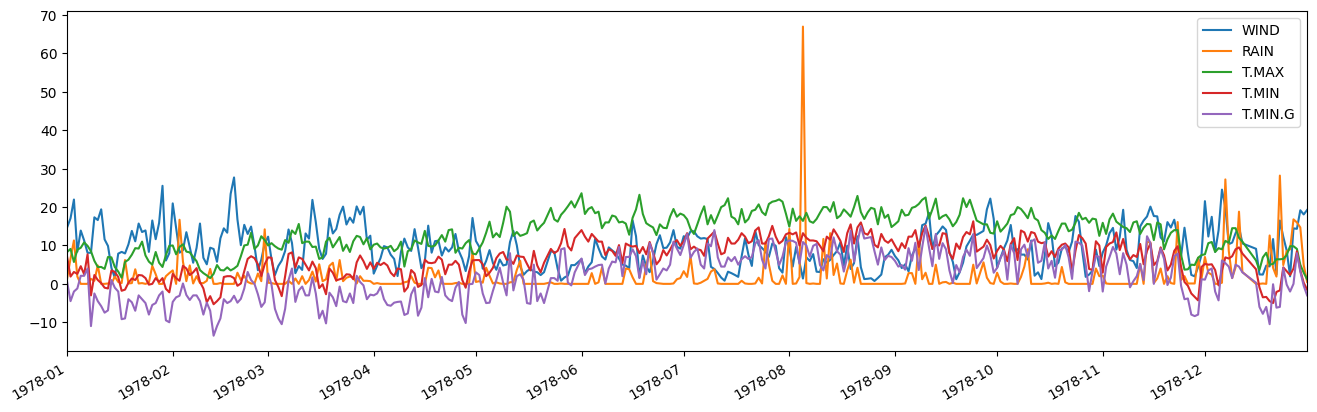

In [67]:
title=''
ylabel=''
xlabel='' 

ax = df[['WIND' , 'RAIN' , 'T.MAX' , "T.MIN" , 'T.MIN.G']].plot(figsize=(16,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [68]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Evidência forte contra a hipótese nula.")
        print("Rejeitar a hipótese nula.")
        print("Dados não tem raiz unitária. Série estacionária.")
    else:
        print("Evidência fraca contra a hipótese nula.")
        print("Falha em rejeitar a hipótese nula.")
        print("Dados tem uma raiz unitária. Série não estacionária.")

In [69]:
adf_test(df['WIND'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.516609e+00
p-value                 3.144834e-16
# lags used             0.000000e+00
# observations          3.580000e+02
critical value (1%)    -3.448749e+00
critical value (5%)    -2.869647e+00
critical value (10%)   -2.571089e+00
Evidência forte contra a hipótese nula.
Rejeitar a hipótese nula.
Dados não tem raiz unitária. Série estacionária.


In [70]:
auto_arima(df['WIND'],seasonal=True,m=8).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  359
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1024.601
Date:                Mon, 12 May 2025   AIC                           2055.202
Time:                        19:32:02   BIC                           2066.843
Sample:                             0   HQIC                          2059.832
                                - 359                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5388      0.048     11.277      0.000       0.445       0.632
ma.L1         -0.9696      0.018    -55.113      0.000      -1.004      -0.935
sigma2        17.8406      1.290     13.832      0.000      15.313      20.369
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 7.00
Prob(Q):                              0.63   Prob(JB):                         0.03
Heteroskedasticity (H):               0.96   Skew:                             0.30
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
treino = df.iloc[:int(len(df)*0.9)]
teste = df.iloc[int(len(df)*0.9):]

In [72]:
model = SARIMAX(treino['WIND'],order=(1,1,1),seasonal_order=(1,0,1,12),enforce_invertibility=False)
results = model.fit()
results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.84569D+00    |proj g|=  2.59783D-01

At iterate    5    f=  2.80828D+00    |proj g|=  1.20305D-02

At iterate   10    f=  2.80739D+00    |proj g|=  4.16602D-04

At iterate   15    f=  2.80729D+00    |proj g|=  9.77909D-03

At iterate   20    f=  2.80623D+00    |proj g|=  1.61381D-02

At iterate   25    f=  2.80570D+00    |proj g|=  5.54930D-03

At iterate   30    f=  2.80562D+00    |proj g|=  1.87531D-04

At iterate   35    f=  2.80561D+00    |proj g|=  3.78506D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               WIND   No. Observations:                  323
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -906.214
Date:                            Mon, 12 May 2025   AIC                           1822.427
Time:                                    19:32:02   BIC                           1841.300
Sample:                                         0   HQIC                          1829.962
                                            - 323                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5446      0.053     10.251      0.000       0.440       0.649
ma.L1         -0.9632      0.023    -41.791      0.000      -1.008      -0.918
ar.S.L12      -0.7758      0.364     -2.130      0.033      -1.490      -0.062
ma.S.L12       0.7256      0.397      1.829      0.067      -0.052       1.503
sigma2        16.2078      1.283     12.634      0.000      13.693      18.722
===================================================================================
Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):                 3.42
Prob(Q):                              0.37   Prob(JB):                         0.18
Heteroskedasticity (H):               0.65   Skew:                             0.18
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

[Text(0.5, 0, ''), Text(0, 0.5, '')]

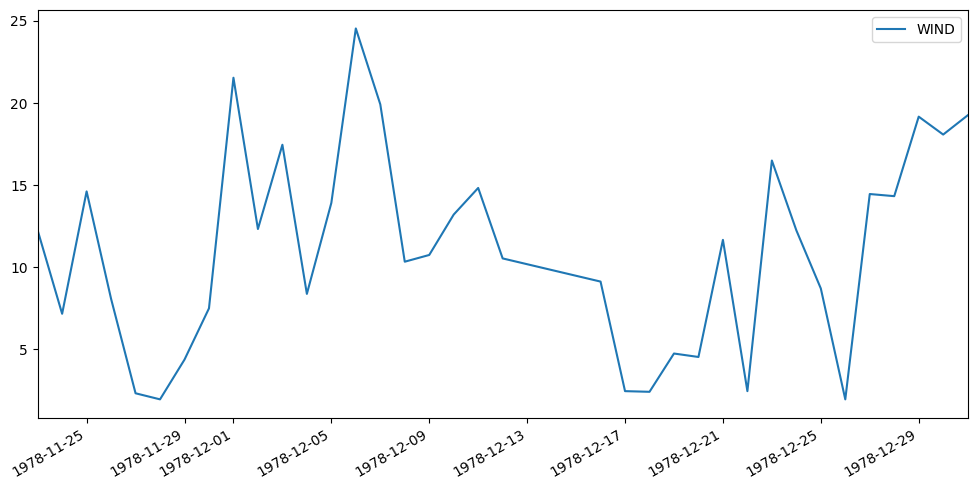

In [73]:
title=''
ylabel=''
xlabel=''

ax = teste['WIND'].plot(legend=True,figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [74]:
from statsmodels.tools.eval_measures import mse,rmse

error1 = mse(teste['WIND'], predictions)
error2 = rmse(teste['WIND'], predictions)

print(f'SARIMA(1,0,0)(1,0,1,7) MSE Error: {error1:11.10}')
print(f'SARIMA(1,0,0)(1,0,1,7) RMSE Error: {error2:11.10}')

SARIMA(1,0,0)(1,0,1,7) MSE Error: 37.20109587
SARIMA(1,0,0)(1,0,1,7) RMSE Error:  6.09927011
